In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv',date_parser='datetime')
test=pd.read_csv('test.csv',date_parser='datetime')

In [6]:
train.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# check the missing vals
train.info()

print('*' * 29)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
*****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 n

## get time from dataset

In [13]:
train['Hour']=pd.DatetimeIndex(train['datetime']).hour
train['month']=pd.DatetimeIndex(train['datetime']).month
train['year']=pd.DatetimeIndex(train['datetime']).year
train['weekday']=pd.DatetimeIndex(train['datetime']).weekday

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5


## some insightful charts

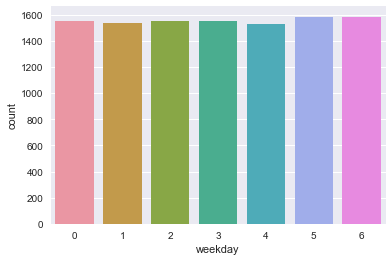

In [15]:
sns.countplot(x='weekday',data=train)

# let see #counts in each hours


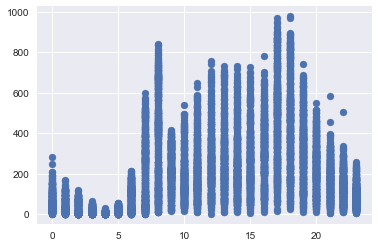

In [18]:
plt.scatter('Hour','count',data=train)

## feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest ,chi2


In [21]:
df=train.drop('datetime',axis=1)
X=df.drop('count',axis=1)
y=df['count']

In [29]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(X,y)
print(fit.scores_)

features=fit.transform(X)
print(features[:5,:])

[  6.10371058e+02   6.81355480e+02   3.20135759e+02   2.34265530e+02
   8.17418862e+03   8.15250147e+03   1.22860675e+04   5.28275691e+03
   4.62518232e+05   1.52880232e+06   1.81204774e+04   2.18955784e+03
   1.81542558e-01   1.25298289e+03]
[[ 81.   3.  13.   0.]
 [ 80.   8.  32.   1.]
 [ 80.   5.  27.   2.]
 [ 75.   3.  10.   3.]
 [ 75.   0.   1.   4.]]


## see top 4 features


In [41]:
list(X.columns)

X.columns[fit.get_support(indices=False)]


Index(['humidity', 'casual', 'registered', 'Hour'], dtype='object')

<bound method BaseEstimator.get_params of SelectKBest(k=4, score_func=<function chi2 at 0x000001D23E546400>)>